Model Iterations with 4 Second Standardized Spectograms

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = '/Users/eitan/Documents/Flatiron/Eyeballing-Urban-Sounds/train_splits_2'

test_dir = '/Users/eitan/Documents/Flatiron/Eyeballing-Urban-Sounds/test_splits_2'

In [7]:
train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = .2)

In [8]:
train_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',

)

Found 5240 images belonging to 10 classes.


In [42]:
train_generator

In [9]:
val_data_gen = ImageDataGenerator(rescale=1./255)

In [10]:
validation_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',

)

Found 1309 images belonging to 10 classes.


In [11]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [16]:
test_generator = test_data_gen.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False

)


Found 2183 images belonging to 10 classes.


In [17]:
model = Sequential()

In [18]:
# define 3x3 filter window sizes. Create 32 filters.
model.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
# max pool in 2x2 window
model.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# transition to dense fully-connected part of network
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [20]:
history_cnn = model.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 10,
         )

Epoch 1/10
164/164 [==============================] - 40s 241ms/step - loss: 1.8231 - accuracy: 0.3353 - val_loss: 1.6028 - val_accuracy: 0.3858
Epoch 2/10
164/164 [==============================] - 40s 242ms/step - loss: 1.2606 - accuracy: 0.5582 - val_loss: 1.5044 - val_accuracy: 0.4507
Epoch 3/10
164/164 [==============================] - 40s 244ms/step - loss: 0.9482 - accuracy: 0.6777 - val_loss: 1.8179 - val_accuracy: 0.4790
Epoch 4/10
164/164 [==============================] - 40s 241ms/step - loss: 0.7358 - accuracy: 0.7519 - val_loss: 1.7544 - val_accuracy: 0.5004
Epoch 5/10
164/164 [==============================] - 39s 235ms/step - loss: 0.5456 - accuracy: 0.8183 - val_loss: 1.7605 - val_accuracy: 0.5050
Epoch 6/10
164/164 [==============================] - 40s 243ms/step - loss: 0.4231 - accuracy: 0.8603 - val_loss: 1.7014 - val_accuracy: 0.5256
Epoch 7/10
164/164 [==============================] - 39s 239ms/step - loss: 0.3222 - accuracy: 0.8887 - val_loss: 2.1483 - val_ac

In [24]:
model2 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-3) ))

# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model2.add(Dropout(0.2))


model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model2.add(Dropout(0.2))



# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [25]:
history_cnn_2 = model2.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 20,
         )

Epoch 1/20
164/164 [==============================] - 41s 246ms/step - loss: 2.4336 - accuracy: 0.2208 - val_loss: 2.1290 - val_accuracy: 0.2544
Epoch 2/20
164/164 [==============================] - 41s 250ms/step - loss: 1.9509 - accuracy: 0.3151 - val_loss: 2.4577 - val_accuracy: 0.1276
Epoch 3/20
164/164 [==============================] - 43s 262ms/step - loss: 1.6950 - accuracy: 0.4223 - val_loss: 1.9474 - val_accuracy: 0.2918
Epoch 4/20
164/164 [==============================] - 42s 257ms/step - loss: 1.4963 - accuracy: 0.4958 - val_loss: 1.6659 - val_accuracy: 0.4202
Epoch 5/20
164/164 [==============================] - 43s 260ms/step - loss: 1.3579 - accuracy: 0.5521 - val_loss: 1.4723 - val_accuracy: 0.4759
Epoch 6/20
164/164 [==============================] - 42s 258ms/step - loss: 1.2615 - accuracy: 0.5899 - val_loss: 1.9551 - val_accuracy: 0.3285
Epoch 7/20
164/164 [==============================] - 43s 263ms/step - loss: 1.1267 - accuracy: 0.6365 - val_loss: 1.3783 - val_ac

In [26]:
_, test_acc = model2.evaluate(test_generator)

69/69 [==============================] - 13s 192ms/step - loss: 0.9829 - accuracy: 0.7343


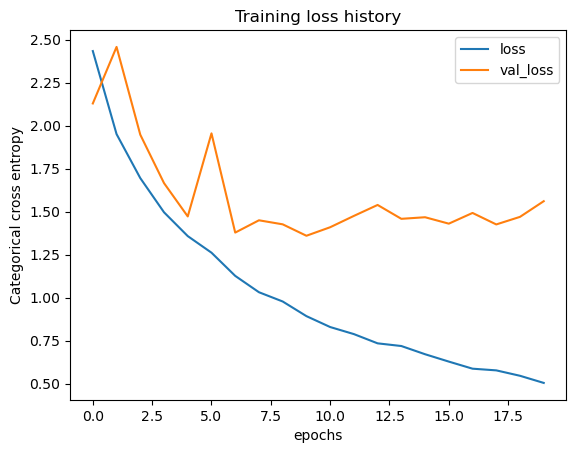

In [46]:
train_cnn_history = pd.DataFrame(history_cnn_2.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

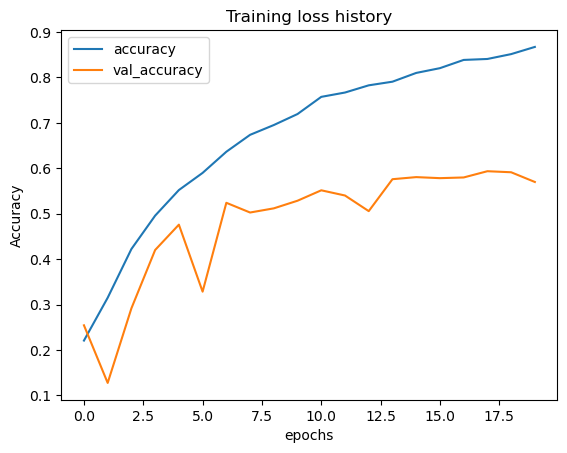

In [31]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [30]:
train_cnn_history

,loss,accuracy,val_loss,val_accuracy
epochs,,,,
0,2.433559,0.220802,2.129001,0.254393
1,1.950871,0.315076,2.457668,0.127578
2,1.694975,0.422328,1.947378,0.291826
3,1.496293,0.495802,1.665926,0.420168
4,1.357911,0.552099,1.472293,0.475936
5,1.261499,0.589885,1.955125,0.328495
6,1.126678,0.636450,1.378342,0.524064
7,1.031625,0.673664,1.449818,0.502674
8,0.977818,0.695229,1.426371,0.511841


In [32]:
predictions = model2.predict(test_generator)


69/69 [==============================] - 14s 194ms/step


In [33]:
predicted_labels = [np.argmax(pred) for pred in predictions]


In [34]:
true_labels = test_generator.classes


In [35]:
accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)


Accuracy: 0.7343105817682088


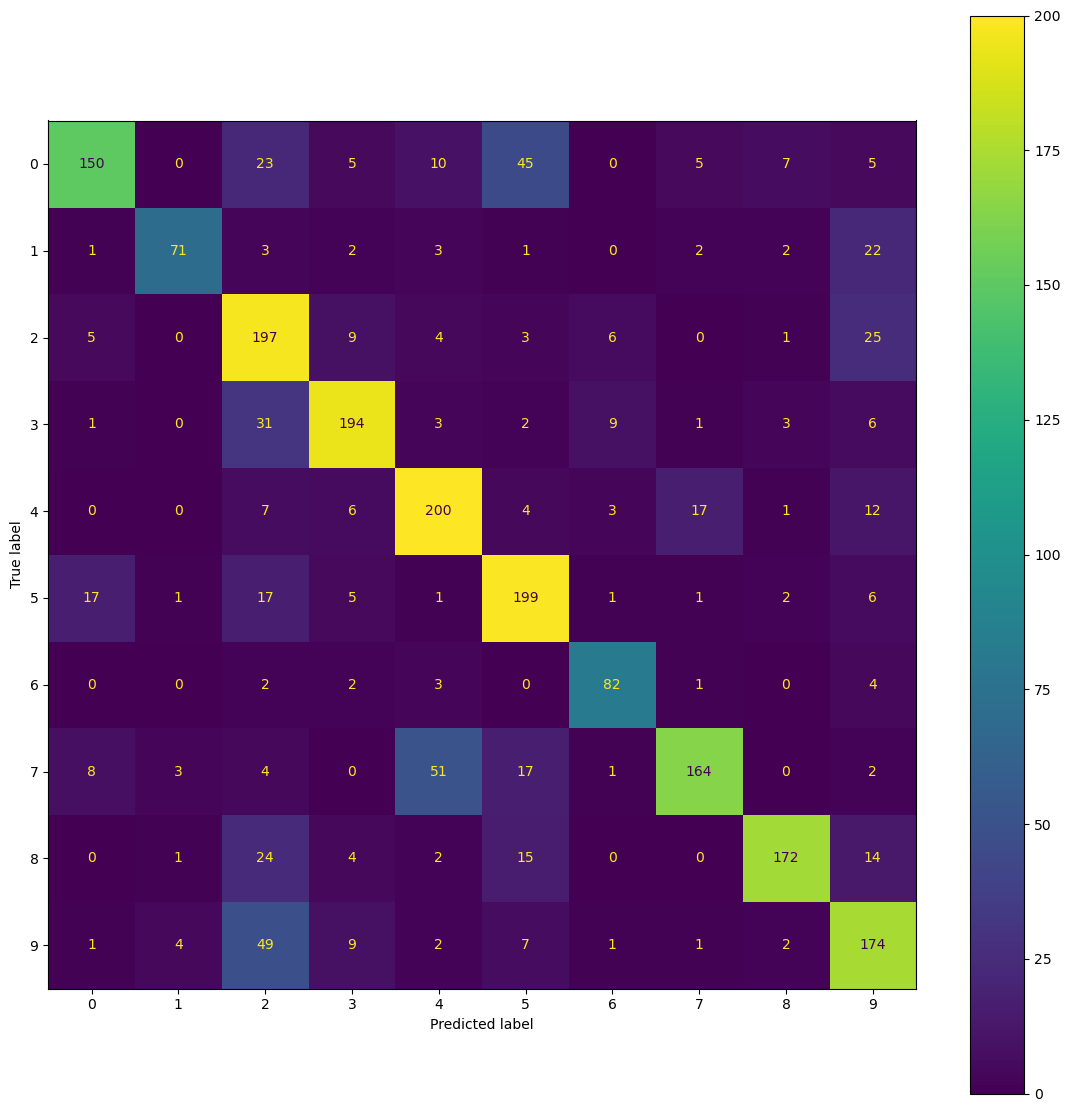

In [36]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);

In [38]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jackhammer', 'siren', 'street_music']

In [39]:
y_true_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])
    

In [40]:
y_pred_labeled = []

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])
    

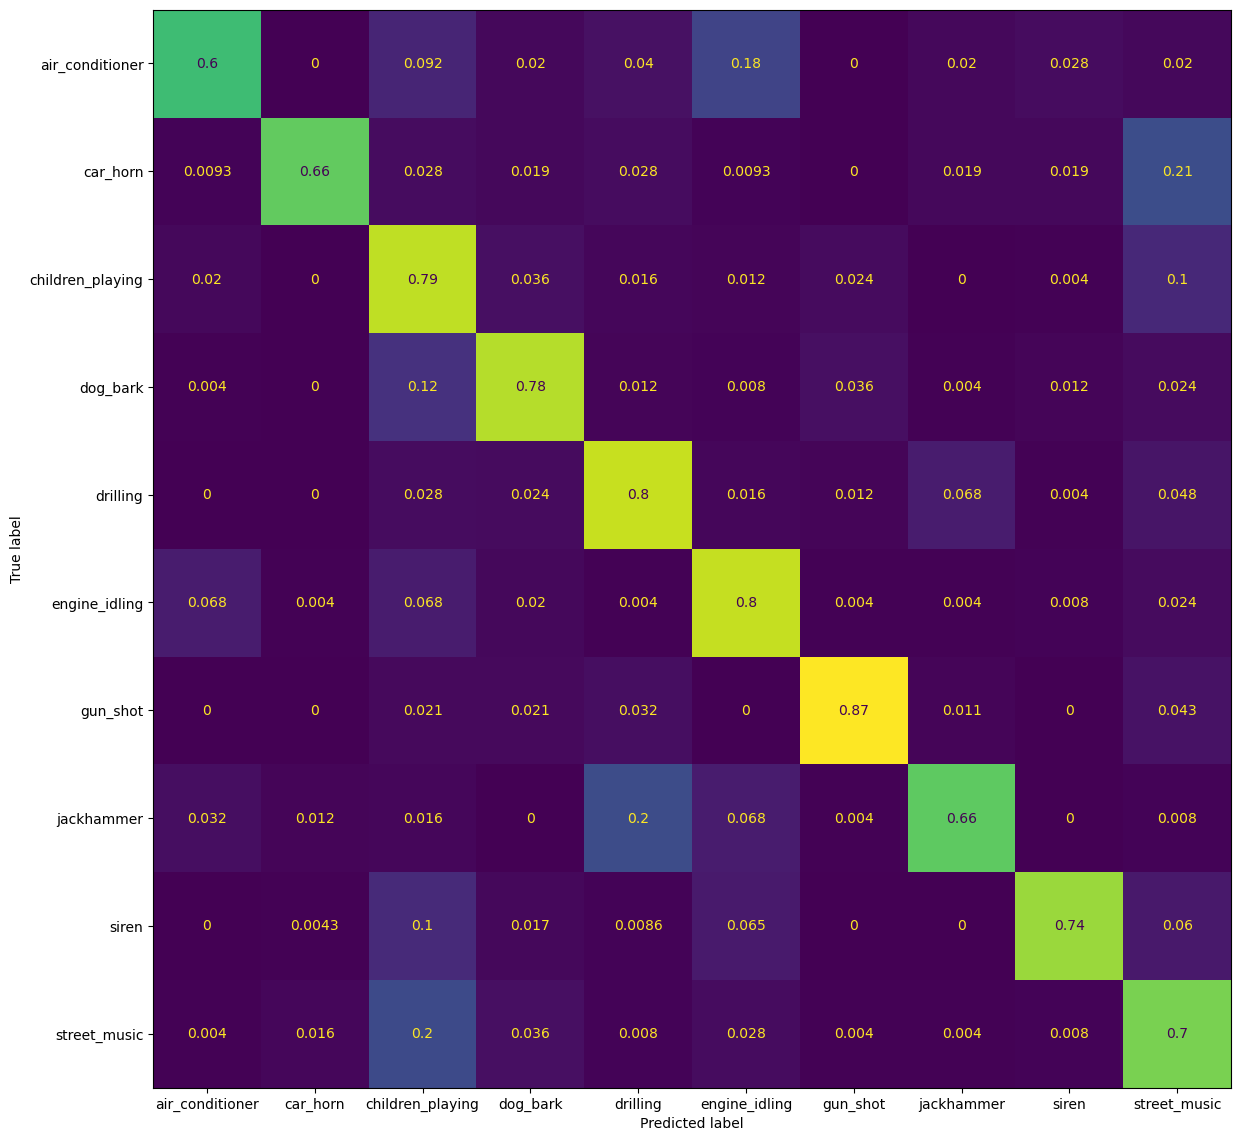

In [41]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax);

In [ ]:
model3 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(Dropout(0.2))


model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(Dropout(0.25))



# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.25))

model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [47]:
model3 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(Dropout(0.25))


model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model3.add(Dropout(0.25))



# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))

model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [48]:
history_cnn_3 = model3.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 30,
         )

Epoch 1/30
164/164 [==============================] - 42s 251ms/step - loss: 2.2407 - accuracy: 0.2019 - val_loss: 2.0156 - val_accuracy: 0.3224
Epoch 2/30
164/164 [==============================] - 41s 248ms/step - loss: 1.9262 - accuracy: 0.2916 - val_loss: 1.8597 - val_accuracy: 0.3445
Epoch 3/30
164/164 [==============================] - 40s 243ms/step - loss: 1.7020 - accuracy: 0.3916 - val_loss: 1.7894 - val_accuracy: 0.3392
Epoch 4/30
164/164 [==============================] - 40s 243ms/step - loss: 1.5092 - accuracy: 0.4718 - val_loss: 1.7641 - val_accuracy: 0.3254
Epoch 5/30
164/164 [==============================] - 40s 245ms/step - loss: 1.3653 - accuracy: 0.5235 - val_loss: 1.5805 - val_accuracy: 0.4270
Epoch 6/30
164/164 [==============================] - 40s 245ms/step - loss: 1.2466 - accuracy: 0.5876 - val_loss: 1.6104 - val_accuracy: 0.4225
Epoch 7/30
164/164 [==============================] - 40s 245ms/step - loss: 1.1429 - accuracy: 0.6254 - val_loss: 1.4578 - val_ac

KeyboardInterrupt: 

In [78]:
model4 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model4.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model4.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(MaxPooling2D((2, 2)))


model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(Dropout(0.2))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.1))


model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(Dropout(0.5))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))


# transition to dense fully-connected part of network
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))

model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_4 = model4.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 25,
         )

Epoch 1/25
164/164 [==============================] - 43s 256ms/step - loss: 2.2840 - accuracy: 0.1809 - val_loss: 2.0540 - val_accuracy: 0.2735
Epoch 2/25
164/164 [==============================] - 41s 252ms/step - loss: 2.0437 - accuracy: 0.2433 - val_loss: 1.9720 - val_accuracy: 0.2406
Epoch 3/25
164/164 [==============================] - 41s 251ms/step - loss: 1.9316 - accuracy: 0.2853 - val_loss: 1.8975 - val_accuracy: 0.3262
Epoch 4/25
164/164 [==============================] - 42s 254ms/step - loss: 1.7360 - accuracy: 0.3708 - val_loss: 1.7206 - val_accuracy: 0.4057
Epoch 5/25
164/164 [==============================] - 42s 253ms/step - loss: 1.5414 - accuracy: 0.4531 - val_loss: 1.7444 - val_accuracy: 0.3216
Epoch 6/25
164/164 [==============================] - 46s 283ms/step - loss: 1.4083 - accuracy: 0.4987 - val_loss: 1.6988 - val_accuracy: 0.3392
Epoch 7/25
164/164 [==============================] - 46s 282ms/step - loss: 1.3160 - accuracy: 0.5389 - val_loss: 1.6448 - val_ac

In [77]:
history_cnn_last = history_cnn_4
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 dropout_26 (Dropout)        (None, 34, 34, 64)       

In [ ]:
history_cnn_last = pd.DataFrame(history_cnn_last.history)

In [75]:
history_cnn_last

,loss,accuracy,val_loss,val_accuracy
0,2.287693,0.171374,2.068507,0.252101
1,2.054454,0.237977,2.124176,0.208556
2,1.964344,0.273473,1.931247,0.326967
3,1.837334,0.314695,1.952773,0.330023
4,1.721160,0.375000,1.852516,0.374332
5,1.570998,0.429580,1.863814,0.313980
6,1.462084,0.482252,1.811780,0.343774
7,1.345991,0.520611,1.724963,0.414820
8,1.275107,0.551718,1.771010,0.376623
9,1.195909,0.585114,1.672462,0.403361


In [34]:
model2 = Sequential()
# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))

model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))

model2.add(BatchNormalization())

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.25))

model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [40]:
model2 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))


model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))



# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

SyntaxError: invalid syntax (1865047285.py, line 12)

In [39]:
history_cnn = model2.fit(train_generator,
                        validation_data = validation_generator,
                        epochs = 10,
         )

Epoch 1/10
164/164 [==============================] - 41s 247ms/step - loss: 1.5636 - accuracy: 0.4523 - val_loss: 2.1088 - val_accuracy: 0.2804
Epoch 2/10
164/164 [==============================] - 41s 248ms/step - loss: 1.0143 - accuracy: 0.6655 - val_loss: 1.8512 - val_accuracy: 0.3858
Epoch 3/10
164/164 [==============================] - 42s 253ms/step - loss: 0.7697 - accuracy: 0.7500 - val_loss: 1.9948 - val_accuracy: 0.3644
Epoch 4/10
164/164 [==============================] - 40s 246ms/step - loss: 0.5721 - accuracy: 0.8145 - val_loss: 1.9896 - val_accuracy: 0.4714
Epoch 5/10
164/164 [==============================] - 40s 246ms/step - loss: 0.4057 - accuracy: 0.8760 - val_loss: 2.2155 - val_accuracy: 0.4882
Epoch 6/10
164/164 [==============================] - 41s 249ms/step - loss: 0.3073 - accuracy: 0.9080 - val_loss: 2.2193 - val_accuracy: 0.5332
Epoch 7/10
164/164 [==============================] - 40s 246ms/step - loss: 0.2458 - accuracy: 0.9275 - val_loss: 3.8928 - val_ac